In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA


In [42]:
df = pd.read_csv('data.csv')
for e in df.columns:
    print(e)
    if (df[e]=='?').any():
        df = df.drop(df[df[e]=='?'].index)

symboling
normalized-losses
make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
wheel-base
length
width
height
curb-weight
engine-type
num-of-cylinders
engine-size
fuel-system
bore
stroke
compression-ratio
horsepower
peak-rpm
city-mpg
highway-mpg
price


In [43]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [44]:
features = ["highway-mpg", "engine-size", "horsepower", "curb-weight"]
data = np.column_stack([df[e].to_numpy().astype(np.float32) for e in features])

In [45]:
#data

In [46]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

pca_2d = PCA(n_components=2)
pca_2d.fit(data)


pca_1d = PCA(n_components=1)
pca_1d.fit(data)


PCA(n_components=1)

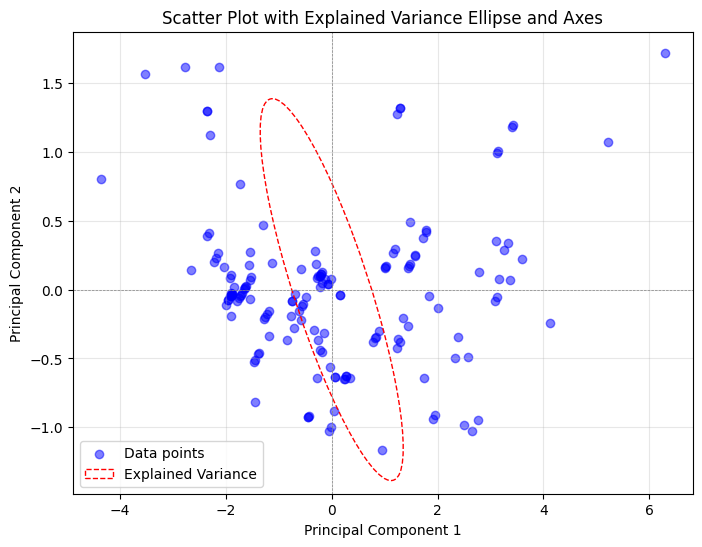

Explained Variance: [3.4334576  0.32024026]


In [47]:
pca = pca_2d
X_pca = pca.fit_transform(data)
explained_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5, label="Data points")



mean = np.mean(X_pca, axis=0)

width = 2 * np.sqrt(explained_variance[0])  # 2 * std deviation for PC1
height = 2 * np.sqrt(explained_variance[1])  # 2 * std deviation for PC2
angle = np.arctan2(components[0, 1], components[0, 0]) * 180 / np.pi  # Rotation angle

ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                  edgecolor='red', facecolor='none', linestyle='--', label="Explained Variance")
plt.gca().add_patch(ellipse)


plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot with Explained Variance Ellipse and Axes')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
print("Explained Variance:", explained_variance)

In [48]:
def get_plot_from_features(features):
    data = np.column_stack([df[e].to_numpy().astype(np.float32) for e in features])

    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    
    pca_2d = PCA(n_components=2)
    pca_2d.fit(data)
    
    
    pca_1d = PCA(n_components=1)
    pca_1d.fit(data)

    pca = pca_2d
    X_pca = pca.fit_transform(data)
    explained_variance = pca.explained_variance_
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5, label="Data points")
    
    
    
    mean = np.mean(X_pca, axis=0)
    
    width = 2 * np.sqrt(explained_variance[0])  # 2 * std deviation for PC1
    height = 2 * np.sqrt(explained_variance[1])  # 2 * std deviation for PC2
    angle = np.arctan2(components[0, 1], components[0, 0]) * 180 / np.pi  # Rotation angle
    
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor='red', facecolor='none', linestyle='--', label="Explained Variance")
    plt.gca().add_patch(ellipse)
    
    
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Scatter Plot with Explained Variance Ellipse and Axes')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    print("Explained Variance:", explained_variance)

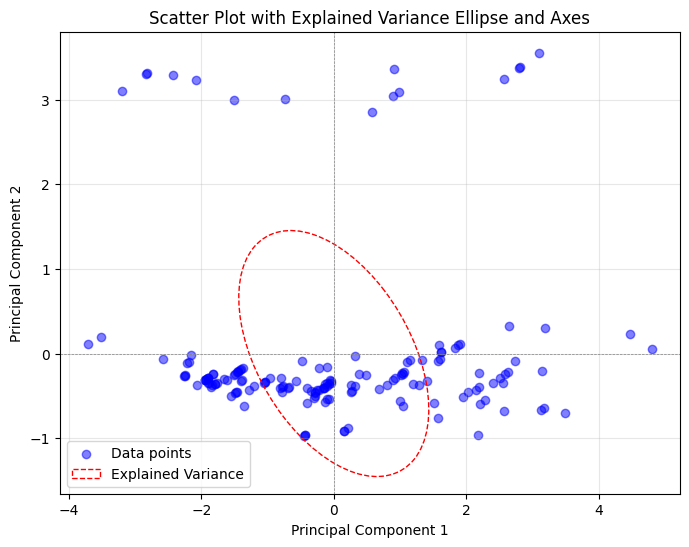

Explained Variance: [3.033761  1.1362721]


In [50]:
get_plot_from_features(['price', 'highway-mpg', 'compression-ratio', 'bore', 'horsepower'])

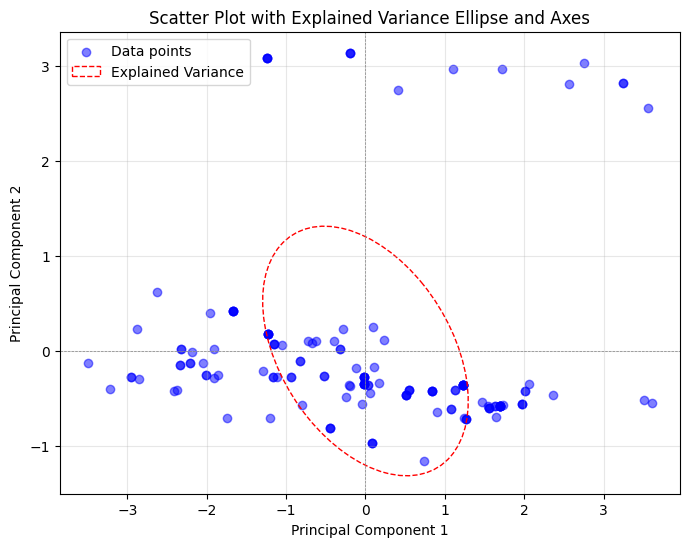

Explained Variance: [2.3791914 1.016882 ]


In [51]:
get_plot_from_features(['highway-mpg', 'compression-ratio', 'bore', 'horsepower'])

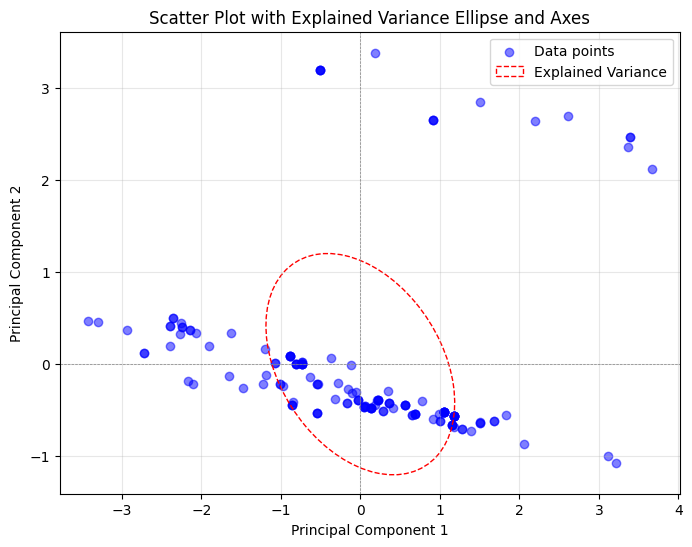

Explained Variance: [1.9211291  0.92695314]


In [52]:
get_plot_from_features(['highway-mpg', 'compression-ratio', 'horsepower'])

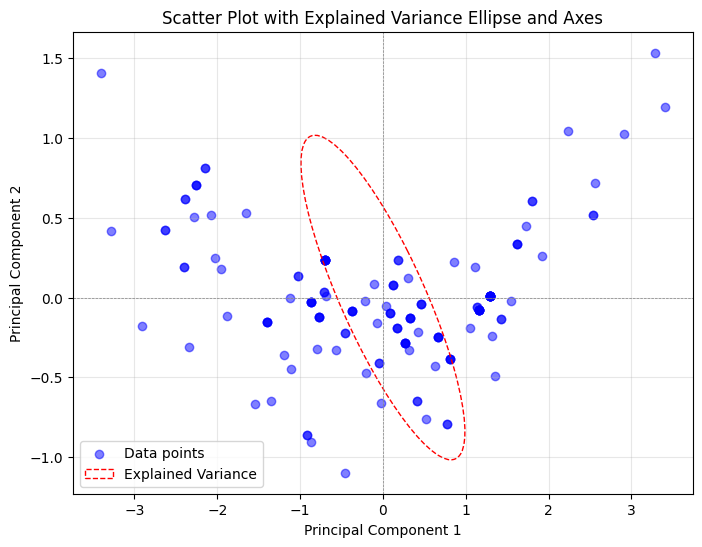

Explained Variance: [1.8395107  0.17314851]


In [53]:
get_plot_from_features(['highway-mpg', 'horsepower'])